<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Exploring SVMs Using Sklearn


---

In [1]:
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, linear_model, datasets
from sklearn.model_selection import cross_val_score

plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### 1. Load the handwritten digits dataset.

In [2]:
digits = datasets.load_digits()
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

1797
64


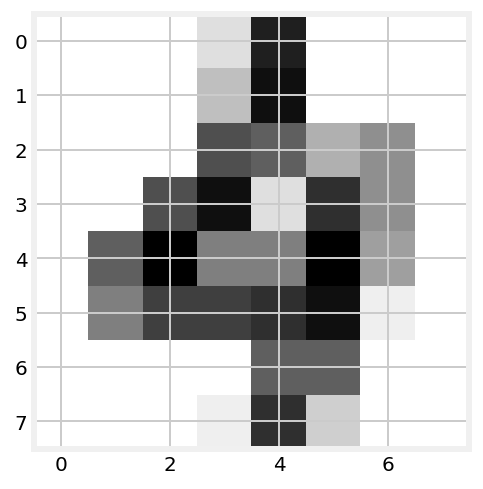

In [3]:
print(len(digits.data))      # 1,797 observations
print(len(digits.data[0]))   # 8 x 8 pixel image

# some number
plt.imshow(digits.images[-20], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [4]:
digits.target[-20]

4

### 2. Cross-validate a logistic regression on the data.

In [5]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import cross_val_score


In [6]:
clf = LogisticRegression(solver='lbfgs')
clf.fit(digits.data, digits.target)
cls_scores = cross_val_score(clf, digits.data, digits.target, cv=5)


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of itera

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of itera

In [7]:
print(cls_scores, np.mean(cls_scores))


[0.91483516 0.88121547 0.95264624 0.95798319 0.89859155] 0.9210543233151656


In [9]:
print(clf.predict)

<bound method LinearClassifierMixin.predict of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)>


### 3. Cross-validate a SVM on the data.

Hint: Check what is the default kernel used. Try some of the alternatives.

In [10]:
clf = svm.SVC(gamma="auto")

In [11]:
clf.fit(digits.data, digits.target)
cls_scores = cross_val_score(clf, digits.data, digits.target, cv=5)

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default 

In [12]:
print(cls_scores, np.mean(cls_scores))


[0.43406593 0.40883978 0.41504178 0.48739496 0.49859155] 0.44878680061604637


In [13]:
clf = svm.SVC(gamma='scale')
print(cross_val_score(clf, digits.data, digits.target, cv=5, scoring='accuracy').mean())

0.9638434678923486


In [14]:
clf = svm.SVC(kernel='linear',decision_function_shape='ovr')
print(cross_val_score(clf, digits.data, digits.target, cv=5, scoring='accuracy').mean())

0.9493348726211526


## Gaussian SVM has two parameters, gamma and C

---

### gamma

Intuitively, the gamma parameter defines how far the influence of a single training example reaches, with low values meaning ‘far’ and high values meaning ‘close’. 

The higher the value of gamma, the more it will try to exactly fit the training data set. That will cause over-fitting problems.
- Small gamma: The model is constrained and can under-fit!  It has high bias and low variance.
- Large gamma: The model tries to capture the shape too well: it can over-fit!  It has low bias and high variance.



### C

`C` is the penalty parameter of the error term. It controls the trade off between smooth decision boundary and classifying the training points correctly. `C` can be thought of as the parameter for the soft margin cost function, which controls the influence of each individual support vector.

- Small C: makes the decision surface smooth and simple, a softer margin can under-fit! Gives high bias and low variance.
- Large C: selects more support vectors: can over-fit! Gives a harder margin, low bias and high variance.

### 4. Fit an SVM modifying the default gamma and C.

### 5. Gridsearch an optimal gamma with C=1.

In [16]:
from sklearn.model_selection import GridSearchCV


In [ ]:
 #model = DecisionTreeRegressor()
# dtr_gs = GridSearchCV(model, dtr_params, cv=5, verbose=1, iid=False)



In [ ]:
#dtr_params = {
   # 'max_depth': list(range(1, 11))+[None],
    #'max_features': [None, 1, 2, 3],
    #'min_samples_split': [2, 3, 4, 5, 10, 15, 20, 25, 30, 40, 50]
#}


In [21]:
model = svm.SVC(C=1.0)
SVC_para = { 'gamma': np.logspace(-5,5,50)}

In [22]:
dtr_gs = GridSearchCV(model, SVC_para, cv=5, verbose=1)


In [23]:
dtr_gs.fit(digits.data, digits.target)
dtr_best = dtr_gs.best_estimator_
print(dtr_gs.best_params_)
print(dtr_gs.best_score_)
print('R2 training: ', gs.score(digits.data, digits.target))
print('R2 CV training: ', gs.best_score_)
print('R2 test: ', gs.score(digits.data, digits.target))


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'gamma': 0.0010985411419875584}
0.9727323316638843


[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:  1.5min finished
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


NameError: name 'gs' is not defined

### 6. Gridsearch the optimal C, gamma, and kernel.

In [24]:
clf = svm.SVC()

In [25]:
gamma_range = np.logspace(-5,2,10)
C_range = np.logspace(-3,2,10)
kernel_range=['rbf','sigmoid','linear','poly']

In [26]:
param_grid = dict(gamma=gamma_range, C=C_range, kernel=kernel_range)

In [28]:
len(gamma_range)

10

In [27]:
param_grid

{'gamma': array([1.00000000e-05, 5.99484250e-05, 3.59381366e-04, 2.15443469e-03,
        1.29154967e-02, 7.74263683e-02, 4.64158883e-01, 2.78255940e+00,
        1.66810054e+01, 1.00000000e+02]),
 'C': array([1.00000000e-03, 3.59381366e-03, 1.29154967e-02, 4.64158883e-02,
        1.66810054e-01, 5.99484250e-01, 2.15443469e+00, 7.74263683e+00,
        2.78255940e+01, 1.00000000e+02]),
 'kernel': ['rbf', 'sigmoid', 'linear', 'poly']}

In [30]:
grid =GridSearchCV(clf, param_grid, cv=3, scoring='accuracy',
                  verbose=1,iid=False)

In [31]:
grid.fit(digits.data,digits.target)

Fitting 3 folds for each of 400 candidates, totalling 1200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:  3.6min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=False, n_jobs=None,
       param_grid={'gamma': array([1.00000e-05, 5.99484e-05, 3.59381e-04, 2.15443e-03, 1.29155e-02,
       7.74264e-02, 4.64159e-01, 2.78256e+00, 1.66810e+01, 1.00000e+02]), 'C': array([1.00000e-03, 3.59381e-03, 1.29155e-02, 4.64159e-02, 1.66810e-01,
       5.99484e-01, 2.15443e+00, 7.74264e+00, 2.78256e+01, 1.00000e+02]), 'kernel': ['rbf', 'sigmoid', 'linear', 'poly']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

In [32]:
print(grid.best_params_)

{'C': 7.742636826811277, 'gamma': 0.00035938136638046257, 'kernel': 'rbf'}


In [33]:
print(grid.best_score_)

0.9721864946362464


### 7. Import the iris dataset.

In [37]:
iris = datasets.load_iris()
iris_X = iris.data[:, :2]  # we only take the first two features. 
iris_y = iris.target

### 8. Cross-validate a default logistic regression and default SVM on the iris data.

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [38]:
iris_X = scaler.fit_transform(iris_X)

In [41]:
lr = LogisticRegression(multi_class='ovr',solver='lbfgs')
print(cross_val_score(lr, iris_X, iris_y, cv=5, scoring='accuracy').mean())

0.8


In [44]:
clf = svm.SVC(kernel='poly', degree=5, coef0=1.5,
             decision_function_shape='ovr',gamma='scale')

In [45]:
print(cross_val_score(clf, iris_X, iris_y, cv=5, scoring='accuracy').mean())

0.8133333333333332


In [46]:
clf = svm.SVC(kernel='rbf',C=1,degree=5,coef0=1.5, 
             decision_function_shape='ovr',gamma='scale')

In [50]:
print(cross_val_score(clf, iris_X, iris_y, cv=5, scoring="accuracy").mean())

0.8066666666666666


### 9. [Bonus] Compare three SVMs with different kernels on the iris data visually.
- Gaussian
- Linear
- Poly of degree 3

Hint: For visual comparison, use only two of the iris features, e.g. sepal length and sepal width.

- Work through the code below and try to understand how the plot is created.
- Interpreted the results of the different kernels.

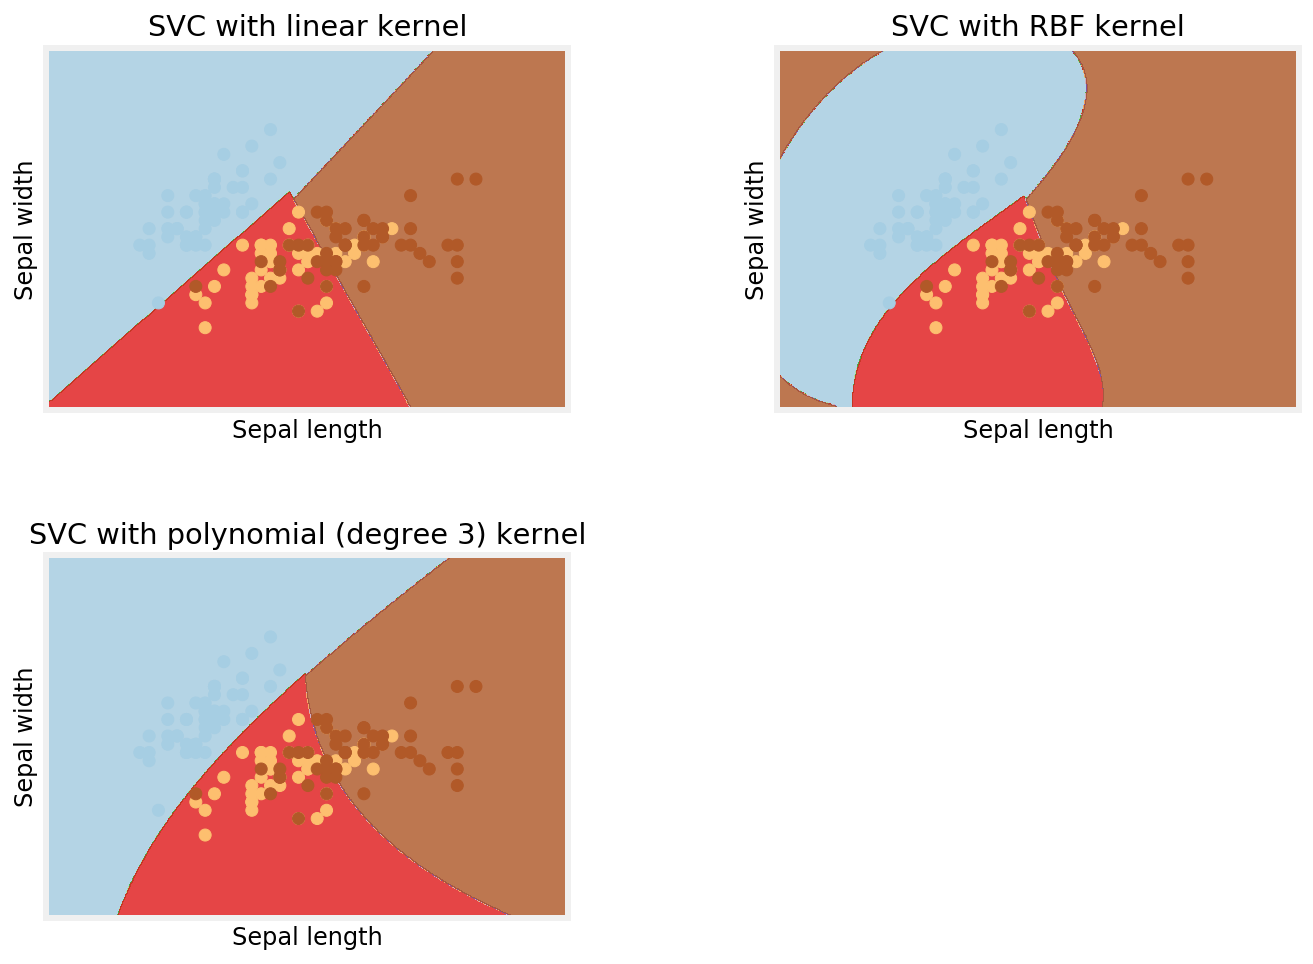

In [13]:
# A:

iris_X = iris.data[:, :2]
C = 1.0  # SVM regularization parameter
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(
    iris_X, iris_y)  # default kernel
svc = svm.SVC(kernel='linear', C=C).fit(iris_X, iris_y)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C,
                   gamma='scale').fit(iris_X, iris_y)

# create a mesh to plot in
x_min, x_max = iris_X[:, 0].min() - 1, iris_X[:, 0].max() + 1
y_min, y_max = iris_X[:, 1].min() - 1, iris_X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .01),
                     np.arange(y_min, y_max, .01))

# title for the plots
titles = ['SVC with linear kernel',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']

plt.figure(figsize=(10, 8))
for i, clf in enumerate((svc, rbf_svc, poly_svc)):
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    # Plot also the training points
    plt.scatter(iris_X[:, 0], iris_X[:, 1], c=iris_y, cmap=plt.cm.Paired)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
plt.show()

### 10. [Bonus] Compare SVM kernels visually on generated data using sklearn's `make_circles`.

Load `make_circles` from here:
```python
from sklearn.datasets import make_circles
```

Compare the linear, rbf, and poly kernels.

In [14]:
# A: